In [2]:
# The DST API wrapper
%pip install git+https://github.com/elben10/pydst

  Cloning https://github.com/elben10/pydst to c:\users\masat\appdata\local\temp\pip-req-build-er1y2j2_
Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pytz>=2017.3 in c:\users\masat\anaconda3\lib\site-packages (from pandas>=0.23.4->pydst==0.1.0.9000) (2021.1)


  Running command git clone -q https://github.com/elben10/pydst 'C:\Users\masat\AppData\Local\Temp\pip-req-build-er1y2j2_'


In [3]:
import numpy as np
import pandas as pd
import datetime

import pandas_datareader # install with `pip install pandas-datareader`
import pydst # install with `pip install git+https://github.com/elben10/pydst`

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

In [4]:
from pandas_datareader import wb

wb_ren = wb.download(indicator='EG.FEC.RNEW.ZS', country=['DE','DK','LT','IT'], start=2000, end=2020)

wb_ren = wb_ren.rename(columns = {'EG.FEC.RNEW.ZS':'Renewable_energy_consumption'})
wb_ren = wb_ren.reset_index()
wb_ren.sample(5)

,country,year,Renewable_energy_consumption
64,Lithuania,2019,33.53
76,Lithuania,2007,17.06
14,Germany,2006,8.59
73,Lithuania,2010,21.46
62,Italy,2000,5.12


In [5]:
wb_ren.year = wb_ren.year.astype(int) # convert year
wb_ren.country = wb_ren.country.astype('string') # convert country to the special pandas string type
wb_ren.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       84 non-null     string 
 1   year                          84 non-null     int32  
 2   Renewable_energy_consumption  80 non-null     float64
dtypes: float64(1), int32(1), string(1)
memory usage: 1.8 KB


In [6]:
wb_gdp = wb.download(indicator='NY.GDP.PCAP.KD.ZG', country=['DE','DK','LT','IT'], start=2000, end=2020)

wb_gdp = wb_gdp.rename(columns = {'NY.GDP.PCAP.KD.ZG':'GDP_per_capita_growth'})
wb_gdp = wb_gdp.reset_index()
wb_gdp.sample(5)

,country,year,GDP_per_capita_growth
47,Italy,2015,0.875477
62,Italy,2000,3.739947
48,Italy,2014,-0.917814
74,Lithuania,2009,-13.887753
30,Denmark,2011,0.920394


In [7]:
wb_gdp.year = wb_gdp.year.astype(int) # convert year
wb_gdp.country = wb_gdp.country.astype('string') # convert country to the special pandas string type
wb_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                84 non-null     string 
 1   year                   84 non-null     int32  
 2   GDP_per_capita_growth  84 non-null     float64
dtypes: float64(1), int32(1), string(1)
memory usage: 1.8 KB


In [8]:
inner = pd.merge(wb_ren, wb_gdp, how='inner', on=['country','year'])
inner.head()

,country,year,Renewable_energy_consumption,GDP_per_capita_growth
0,Germany,2020,NaN,-3.775430
1,Germany,2019,17.17,0.828958
2,Germany,2018,16.12,0.678213
3,Germany,2017,15.22,2.297206
4,Germany,2016,14.24,1.408102


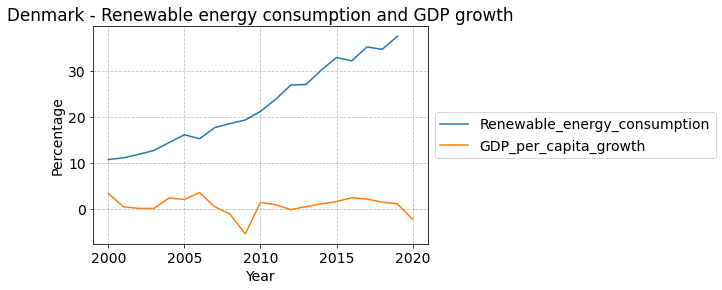

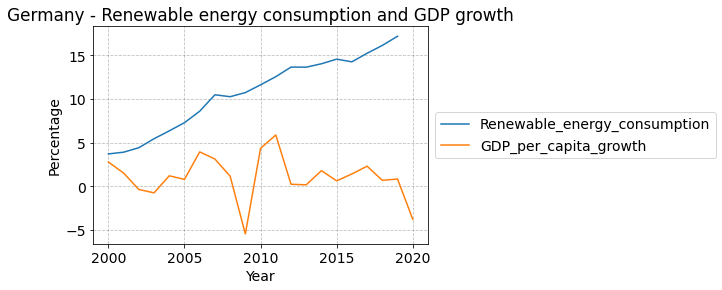

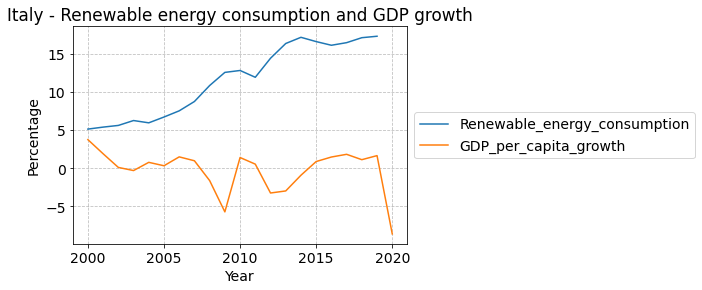

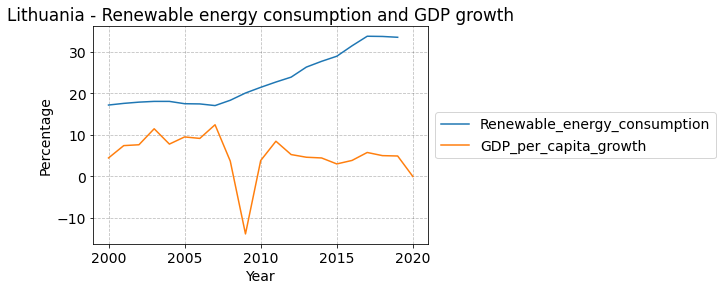

In [9]:
import matplotlib.pyplot as plt

# Grouping by 'country'
grouped = inner.groupby('country')

# Looping through each country and plotting the data
for country, data in grouped:
    # Creating a figure and axis for each country
    fig, ax = plt.subplots()
    ax.plot(data['year'], data['Renewable_energy_consumption'], label='Renewable_energy_consumption')
    ax.plot(data['year'], data['GDP_per_capita_growth'], label='GDP_per_capita_growth')
    

    # Adding labels and title
    ax.set_xlabel('Year')
    ax.set_ylabel('Percentage')
    ax.set_title(f'{country} - Renewable energy consumption and GDP growth')

    # Adding legend
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

    # Adding grid lines
    ax.grid(True)

    # Displaying the plot
    plt.show()

## Explore each data set

In [10]:
# Function that operates on data set
import ipywidgets as widgets
def plot_e(df, country): 
    I = df['country'] == country
    ax=df.loc[I,:].plot(x='year', y='Renewable_energy_consumption', style='-o', legend=False)
    ax=df.loc[I,:].plot(x='year', y='GDP_per_capita_growth', style='-o', legend=False)

# Let the widget interact with data through plot_func()    
widgets.interact(plot_e, 
df = widgets.fixed(inner),
country = widgets.Dropdown(description='country', 
                                options=inner.country.unique(), 
                                value='Denmark')
); 


interactive(children=(Dropdown(description='country', index=1, options=('Germany', 'Denmark', 'Italy', 'Lithua…

# Merge data sets

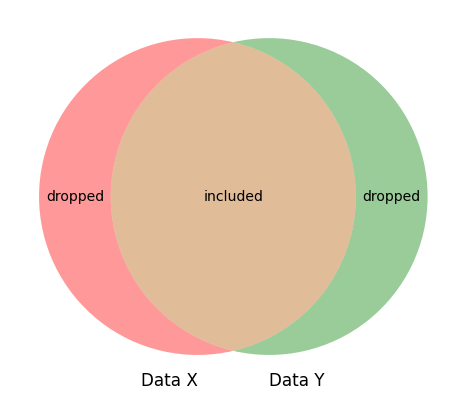

In [11]:
from matplotlib_venn import venn2
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('Data X', 'Data Y'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()